# Kaggle nickname **Svegge**

In [1]:
# 1. Основные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.preprocessing import StandardScaler, RobustScaler

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
# 4. Метирки качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, accuracy_score

C:\Users\v.strekalovskiy\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Функции проекта**

In [2]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [4]:
def feature_check_hist(feature_name):
    plt.figure(figsize = (16, 8))

    plt.subplot(122)
    df[feature_name].hist()
    plt.ylabel('count')
    plt.xlabel(feature_name)

    plt.subplot(121)
    sns.kdeplot(df[feature_name], shade=True, legend=False)
    plt.xlabel(feature_name)

    plt.suptitle(f'{feature_name} shedule')
    plt.show()

In [5]:
def feature_check_scatter(feature_x_name, feature_y_name):
    plt.figure(figsize=(16, 8))

    plt.scatter(df[feature_x_name], df[feature_y_name])

    plt.xlabel(feature_x_name)
    plt.ylabel(feature_y_name)
    plt.title(f'{feature_x_name} schedule by {feature_y_name}')
    plt.show()

In [6]:
def feature_check_boxplot(feature_x_name, feature_y_name):
    plt.figure(figsize=(16, 8))

    sns.boxplot(df[feature_x_name], df[feature_y_name], orient='h')

    plt.xlabel(feature_x_name)
    plt.ylabel(feature_y_name)
    plt.title(f'{feature_y_name} per {feature_x_name} schedule')

**Пути к директориям и файлам**

In [7]:
DATASET_PATH = 'data/train.csv'
FINAL_DATASET_PATH = 'data/test.csv'

**Загрузка данных и преобразование их типов**

In [8]:
df_final = pd.read_csv(FINAL_DATASET_PATH)
df_final = reduce_mem_usage(df_final)

preds_final = pd.DataFrame()
preds_final['Id'] = df_final['Id'].copy()

df = pd.read_csv(DATASET_PATH)
df = reduce_mem_usage(df)
df.describe().T

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%
Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839523,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315712,21.058718,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,7887.0,37.199596,86.241112,0.370619,22.769833,32.781261,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.561113,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.776192,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119026,0.000000,0.017647,0.075424,0.195781,5.218670e-01


# 01 Очистка признаков
## Square

**Рассмотрим признак Square в свете признака Price.**

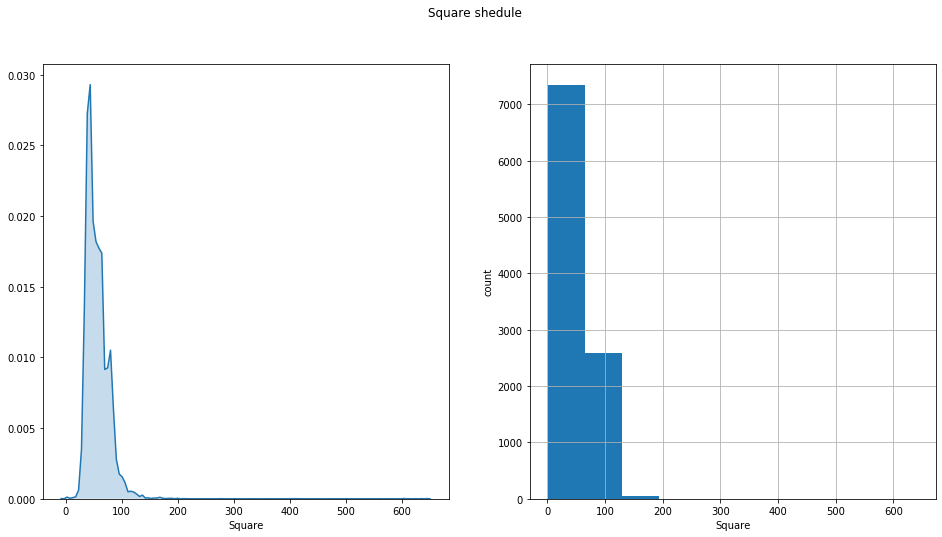

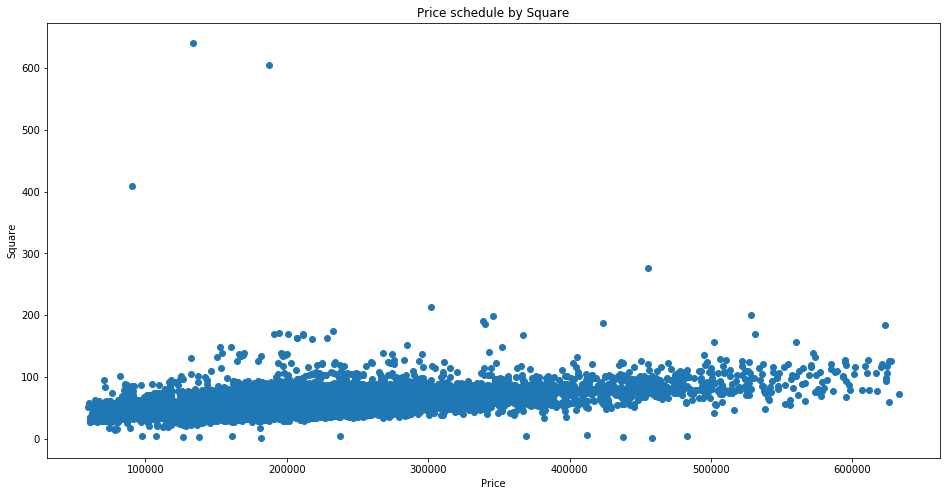

In [9]:
feature_check_hist('Square')
feature_check_scatter('Price', 'Square')

In [10]:
square_min = df['Square'].quantile(0.01)
square_median = df['Square'].quantile(0.5)
square_max = df['Square'].quantile(0.99)
print(square_min, square_median, square_max)

29.71979543685913 52.513309478759766 117.85611785888673


In [11]:
df = df.drop(df[df['Square'] < square_min*0.75].index)
df = df.drop(df[df['Square'] > square_max*1.25].index)

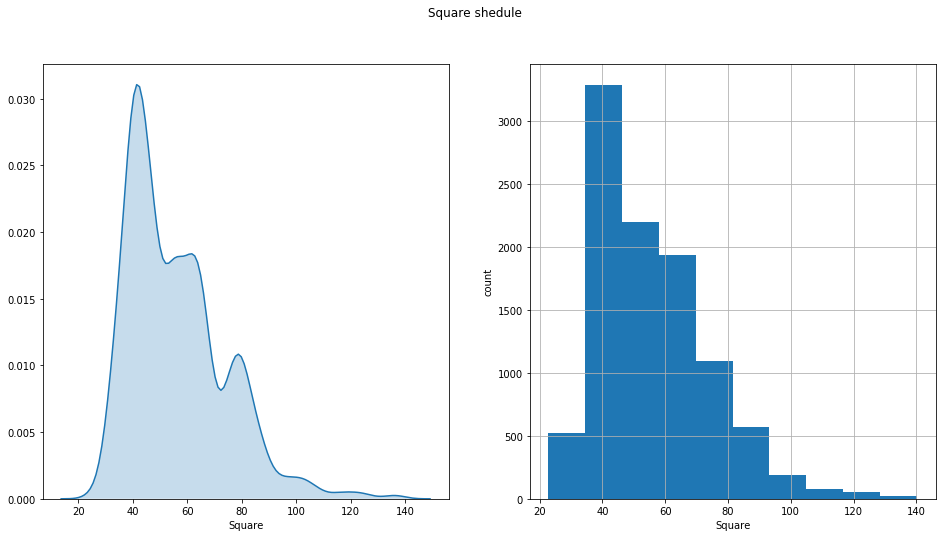

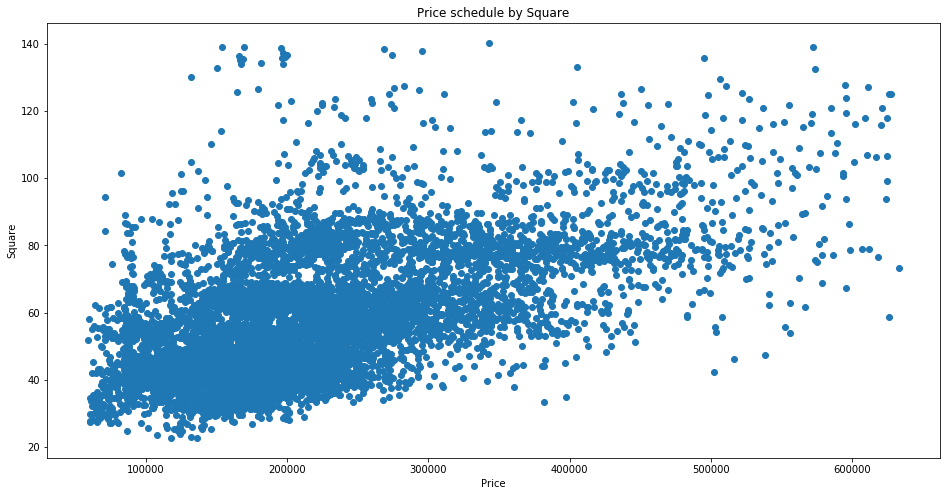

In [12]:
feature_check_hist('Square')
feature_check_scatter('Price', 'Square')

**Для устранения выбросов, удалим из ГС выборку где цена м2 не соответствует референтным значениям.**

In [13]:
#Определение референтных значений
square_price_min = (df['Price'] / df['Square']).quantile(0.01)
square_price_max = (df['Price'] / df['Square']).quantile(0.99)
print(square_price_min, square_price_max)

1408.6937841796876 7173.566074218749


In [14]:
#Удаление строк с некорректными данными
rows_to_drop = len(df[(df['Price'] / df['Square'] < square_price_min * 0.75) |
                  (df['Price'] / df['Square'] > square_price_max * 1.25)])

df = df.drop((df[(df['Price'] / df['Square'] < square_price_min * 0.75) |
                 (df['Price'] / df['Square'] > square_price_max * 1.25)]).index)

print(rows_to_drop, 'rows were deleted from df')

24 rows were deleted from df


## Rooms

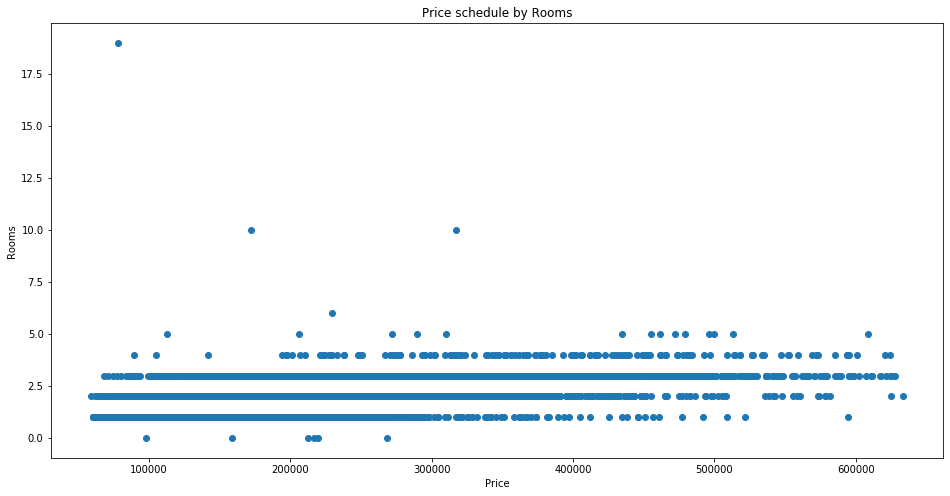

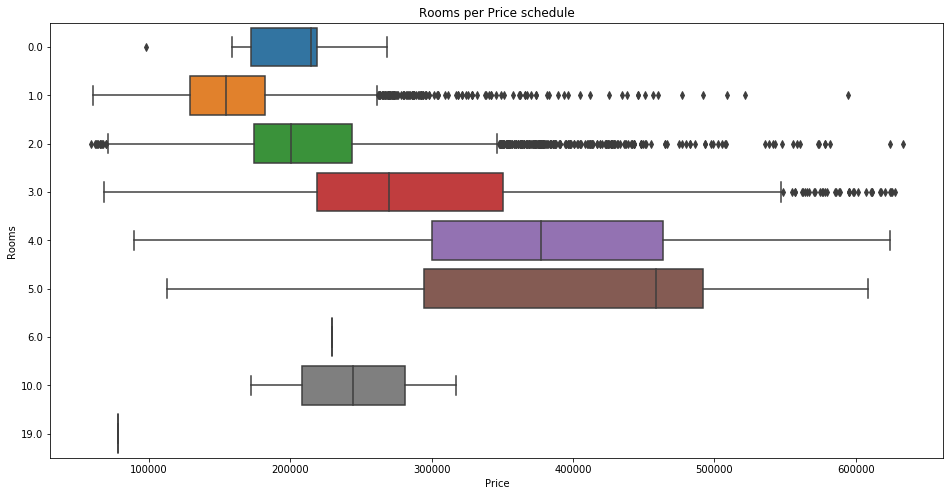

In [15]:
feature_check_scatter('Price', 'Rooms')
feature_check_boxplot('Price', 'Rooms')

**Определим референтные значения квадратуры одной комнаты**

In [16]:
square_room_min = (df['Square'] / df['Rooms']).quantile(0.01)
square_room_max = (df['Square'] / df['Rooms']).quantile(0.99)
square_room_median = (df['Square'] / df['Rooms']).quantile(0.5)
print(square_room_min, square_room_median, square_room_max)

17.771692657470705 30.836374282836914 58.03902053833003


**В позициях с сильными отклонениями значений квадратуры на 1 комнату заменим количество комнат на вычисленное значение.**

In [17]:
df.loc[(df['Square'] / df['Rooms'] < square_room_min * 0.75) |
       (df['Square'] / df['Rooms'] > square_room_max * 1.25), 'Rooms'] = \
df.loc[(df['Square'] / df['Rooms'] < square_room_min * 0.75) |
       (df['Square'] / df['Rooms'] > square_room_max * 1.25), 'Square'] // square_room_median

In [18]:
df_final.loc[(df_final['Square'] / df_final['Rooms'] < square_room_min * 0.75) |
       (df_final['Square'] / df_final['Rooms'] > square_room_max * 1.25), 'Rooms'] = \
df_final.loc[(df_final['Square'] / df_final['Rooms'] < square_room_min * 0.75) |
       (df_final['Square'] / df_final['Rooms'] > square_room_max * 1.25), 'Square'] // square_room_median

**Там где вычисленное количество комнат получилось = 0, заменим значения на 1.**

In [19]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 1
df_final.loc[df_final['Rooms'] == 0, 'Rooms'] = 1

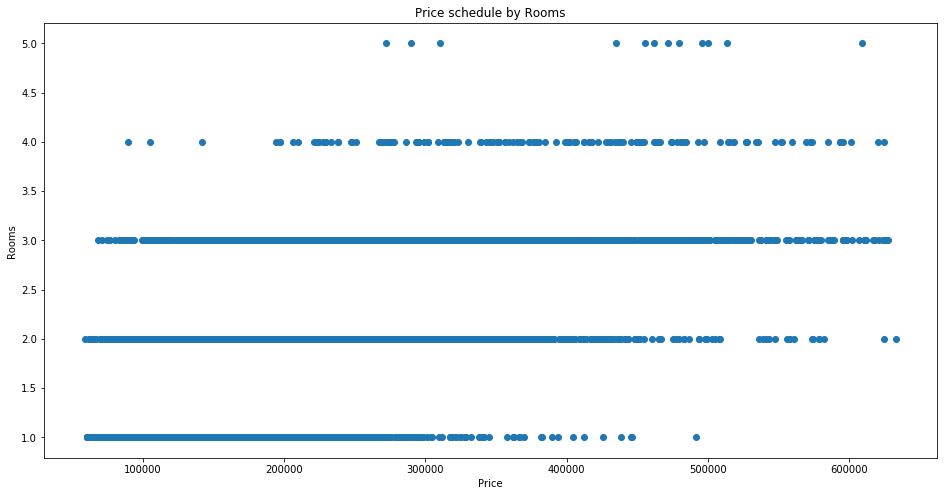

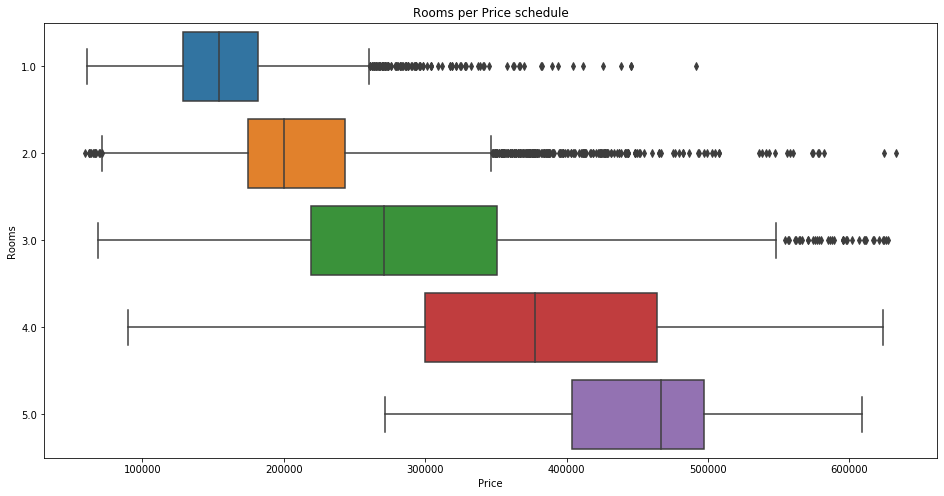

In [20]:
feature_check_scatter('Price', 'Rooms')
feature_check_boxplot('Price', 'Rooms')

## LifeSquare

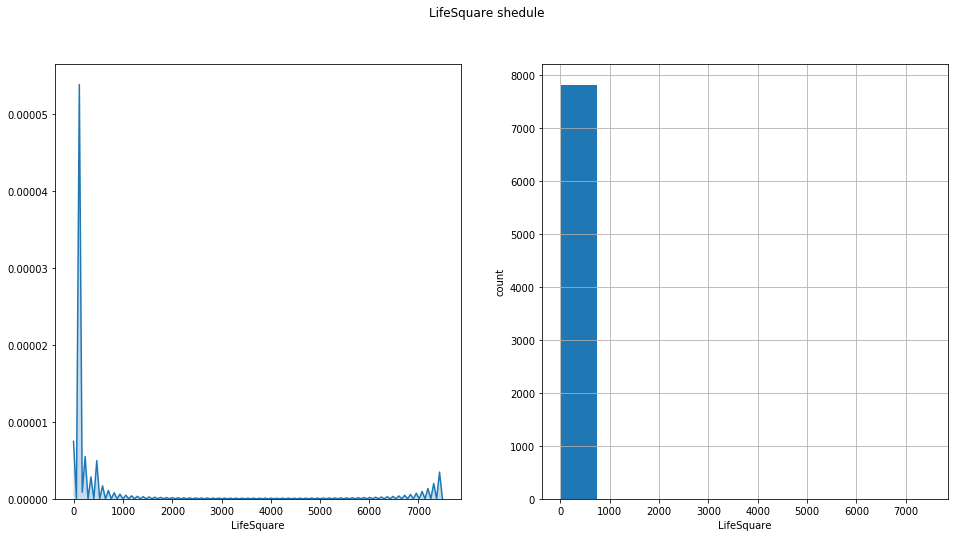

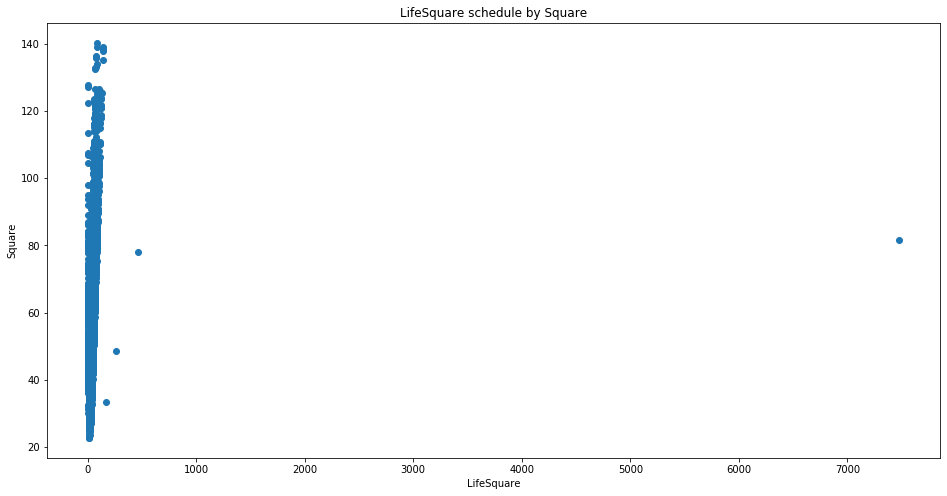

In [21]:
feature_check_hist('LifeSquare')
feature_check_scatter('LifeSquare', 'Square')

**Вычислим коэффициенты соотношения жилой площади к площади в целом для корректных данных.**

In [22]:
k_life_square_median = (
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'LifeSquare']
    /
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'Square']).median()

k_life_square_min = (
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'LifeSquare']
    /
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'Square']).quantile(0.1)

k_life_square_max = (
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'LifeSquare']
    /
    df.loc[(df['LifeSquare'] != 0) & (df['LifeSquare'] < df['Square']), 'Square']).quantile(0.9)


print(k_life_square_min, k_life_square_median, k_life_square_max)

0.48947468400001526 0.6105118989944458 0.860569489002229


**Для позиций где (LifeSquare > LifeSquare good values) & (LifeSquare == nan) произведем вычисления LifeSquare с помощью полученного коэффициента.**

In [23]:
df.loc[(df['LifeSquare'] / df['Square'] < k_life_square_min * 0.75) |
       (df['LifeSquare'] / df['Square'] > k_life_square_max * 1.25) |
       (df['LifeSquare'].isna()) |
       (df['LifeSquare'] > df['Square']), 'LifeSquare'] = (
    
   df.loc[(df['LifeSquare'] / df['Square'] < k_life_square_min * 0.75) |
          (df['LifeSquare'] / df['Square'] > k_life_square_max * 1.25) |
          (df['LifeSquare'].isna()) |
          (df['LifeSquare'] > df['Square']), 'Square']
   *
   k_life_square_median
)

In [24]:
df_final.loc[(df_final['LifeSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
       (df_final['LifeSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
       (df_final['LifeSquare'].isna()) |
       (df_final['LifeSquare'] > df_final['Square']), 'LifeSquare'] = (
    
   df_final.loc[(df_final['LifeSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
          (df_final['LifeSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
          (df_final['LifeSquare'].isna()) |
          (df_final['LifeSquare'] > df_final['Square']), 'Square']
   *
   k_life_square_median
)

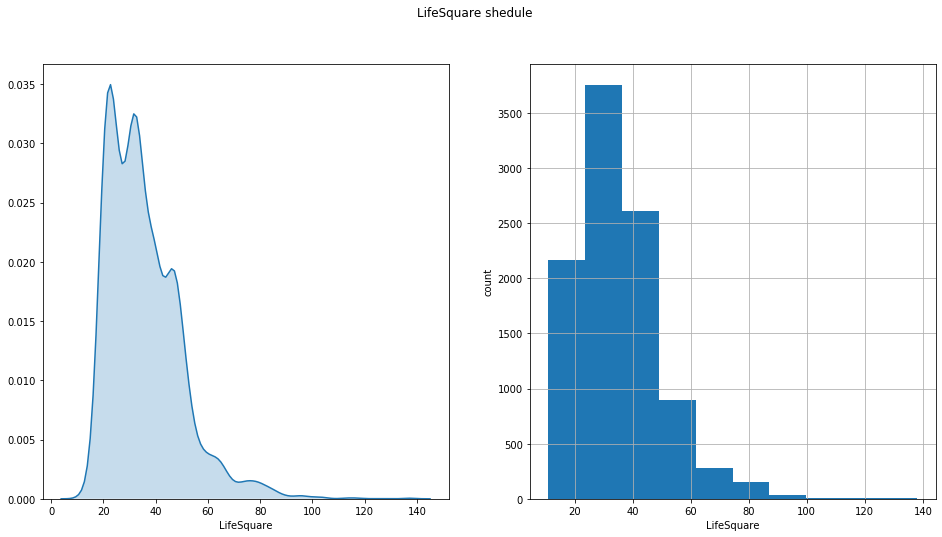

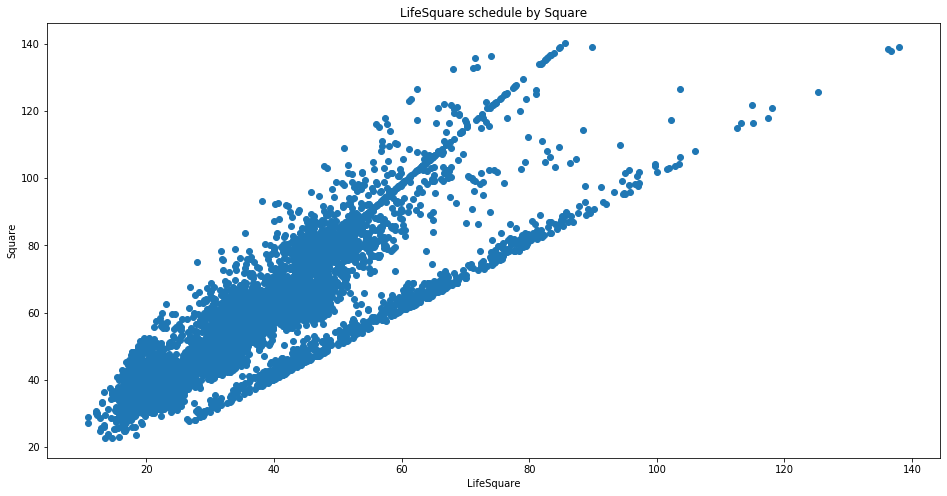

In [25]:
feature_check_hist('LifeSquare')
feature_check_scatter('LifeSquare', 'Square')

## KitchenSquare

**Повторим для KitchenSquare все операции проделанные ранее на LifeSquare**

In [26]:
k_kitchen_square_median = (
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'KitchenSquare']
    /
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'Square']).median()

k_kitchen_square_min = (
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'KitchenSquare']
    /
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'Square']).quantile(0.1)

k_kitchen_square_max = (
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'KitchenSquare']
    /
    df.loc[(df['KitchenSquare'] != 0) &
           (df['KitchenSquare'] < df['Square']) &
           ((df['KitchenSquare'] + df['LifeSquare']) < df['Square']), 'Square']).quantile(0.9)


print(k_kitchen_square_min, k_kitchen_square_median, k_kitchen_square_max)

0.01559075266122818 0.12611138820648193 0.2044337049126625


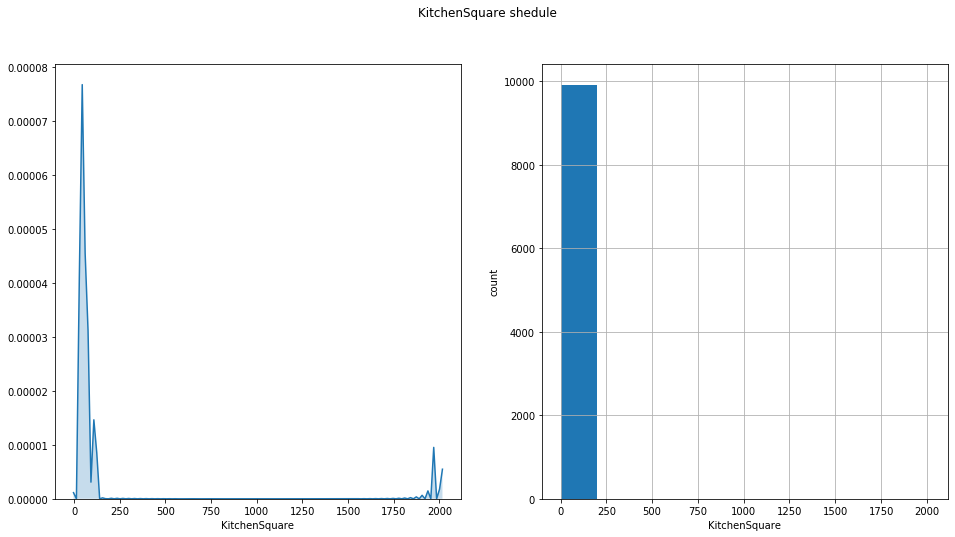

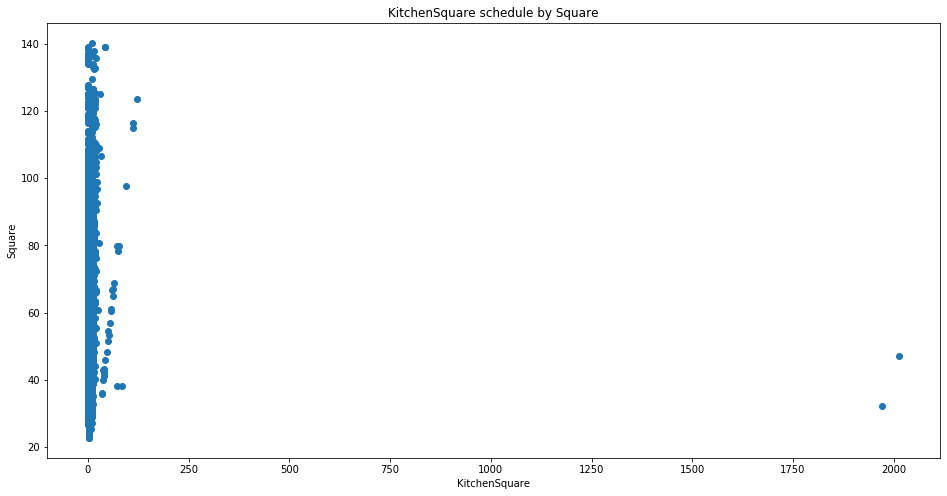

In [27]:
feature_check_hist('KitchenSquare')
feature_check_scatter('KitchenSquare', 'Square')

In [28]:
df.loc[(df['KitchenSquare'] / df['Square'] < k_life_square_min * 0.75) |
       (df['KitchenSquare'] / df['Square'] > k_life_square_max * 1.25) |
       (df['KitchenSquare'].isna()) |
       ((df['KitchenSquare'] + df['LifeSquare']) > df['Square']), 'KitchenSquare'] = (
    
df.loc[(df['KitchenSquare'] / df['Square'] < k_life_square_min * 0.75) |
       (df['KitchenSquare'] / df['Square'] > k_life_square_max * 1.25) |
       (df['KitchenSquare'].isna()) |
       ((df['KitchenSquare'] + df['LifeSquare']) > df['Square']), 'Square'] 
   *
   k_kitchen_square_median
)

In [29]:
df_final.loc[(df_final['KitchenSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
       (df_final['KitchenSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
       (df_final['KitchenSquare'].isna()) |
       ((df_final['KitchenSquare'] + df_final['LifeSquare']) > df_final['Square']), 'KitchenSquare'] = (
    
df_final.loc[(df_final['KitchenSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
       (df_final['KitchenSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
       (df_final['KitchenSquare'].isna()) |
       ((df_final['KitchenSquare'] + df_final['LifeSquare']) > df_final['Square']), 'Square'] 
   *
   k_kitchen_square_median
)

**Проверим соотношение Square к (HouseSquare & KitchenSquare) и исправим некорректные значения.**

In [30]:
df.loc[(df['LifeSquare'] / df['Square'] < k_life_square_min * 0.75) |
       (df['LifeSquare'] / df['Square'] > k_life_square_max * 1.25) |
       (df['LifeSquare'].isna()) |
       (df['LifeSquare'] > df['Square']), 'LifeSquare'] = (
    
   df.loc[(df['LifeSquare'] / df['Square'] < k_life_square_min * 0.75) |
          (df['LifeSquare'] / df['Square'] > k_life_square_max * 1.25) |
          (df['LifeSquare'].isna()) |
          (df['LifeSquare'] > df['Square']), 'Square']
   *
   k_life_square_median
)

In [31]:
df_final.loc[(df_final['LifeSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
       (df_final['LifeSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
       (df_final['LifeSquare'].isna()) |
       (df_final['LifeSquare'] > df_final['Square']), 'LifeSquare'] = (
    
   df_final.loc[(df_final['LifeSquare'] / df_final['Square'] < k_life_square_min * 0.75) |
          (df_final['LifeSquare'] / df_final['Square'] > k_life_square_max * 1.25) |
          (df_final['LifeSquare'].isna()) |
          (df_final['LifeSquare'] > df_final['Square']), 'Square']
   *
   k_life_square_median
)

In [32]:
df.loc[(df['LifeSquare'] + df['KitchenSquare']) > df['Square'], 'LifeSquare'] = \
df.loc[(df['LifeSquare'] + df['KitchenSquare']) > df['Square'], 'Square'] * k_kitchen_square_median

In [33]:
df_final.loc[(df_final['LifeSquare'] + df_final['KitchenSquare']) > df_final['Square'], 'LifeSquare'] = \
df_final.loc[(df_final['LifeSquare'] + df_final['KitchenSquare']) > df_final['Square'], 'Square'] * k_kitchen_square_median

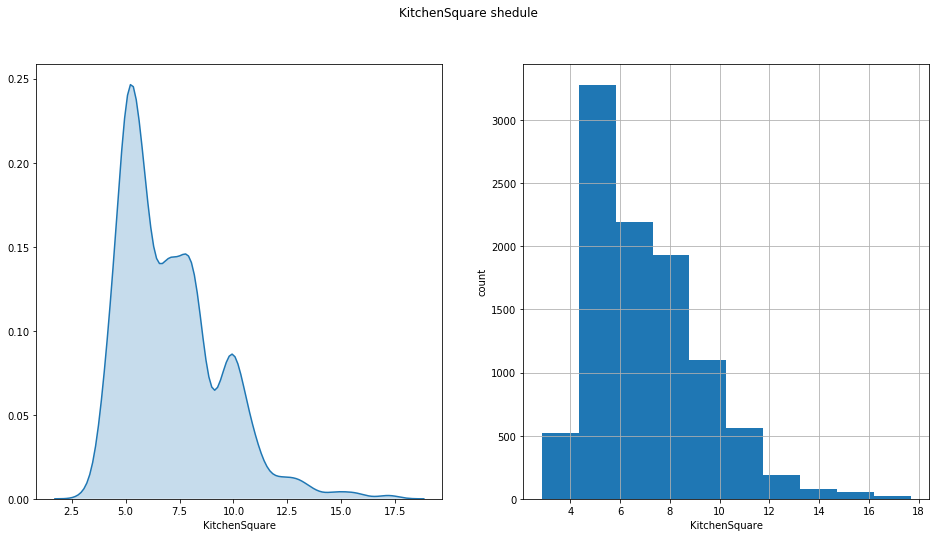

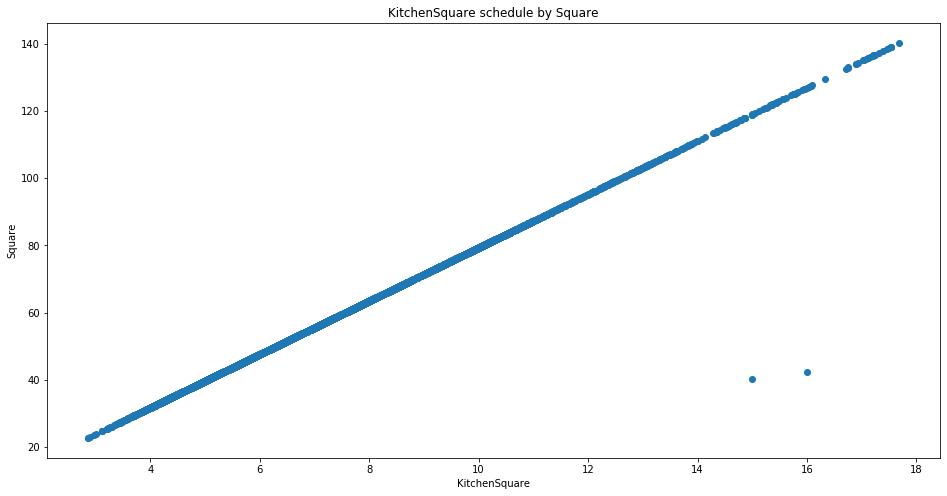

In [34]:
feature_check_hist('KitchenSquare')
feature_check_scatter('KitchenSquare', 'Square')

## HouseYear

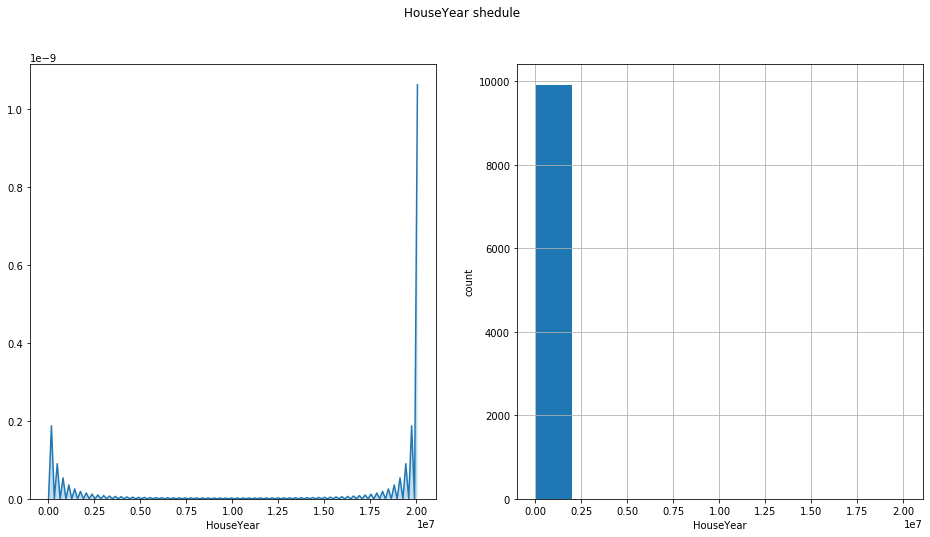

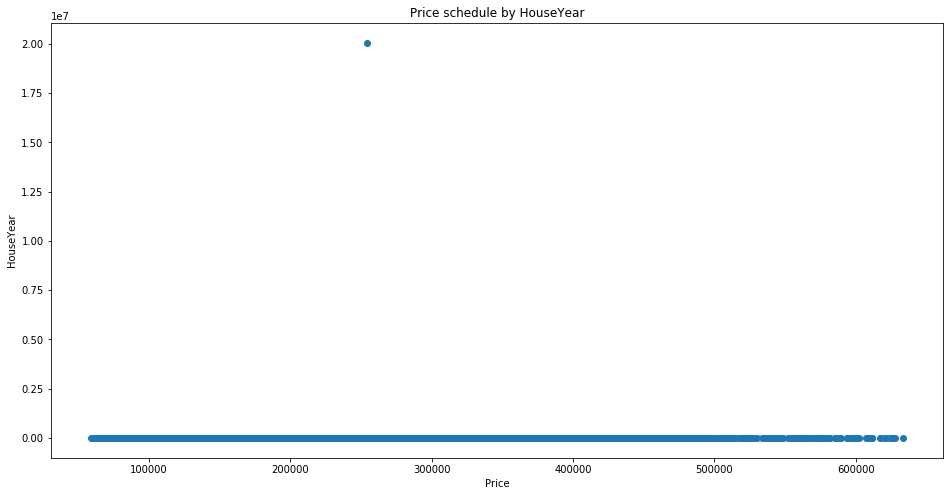

In [35]:
feature_check_hist('HouseYear')
feature_check_scatter('Price', 'HouseYear')

In [36]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = df.loc[df['HouseYear'] <= 2020, 'HouseYear'].median()

In [37]:
df_final.loc[df_final['HouseYear'] > 2020, 'HouseYear'] = df_final.loc[df_final['HouseYear'] <= 2020, 'HouseYear'].median()

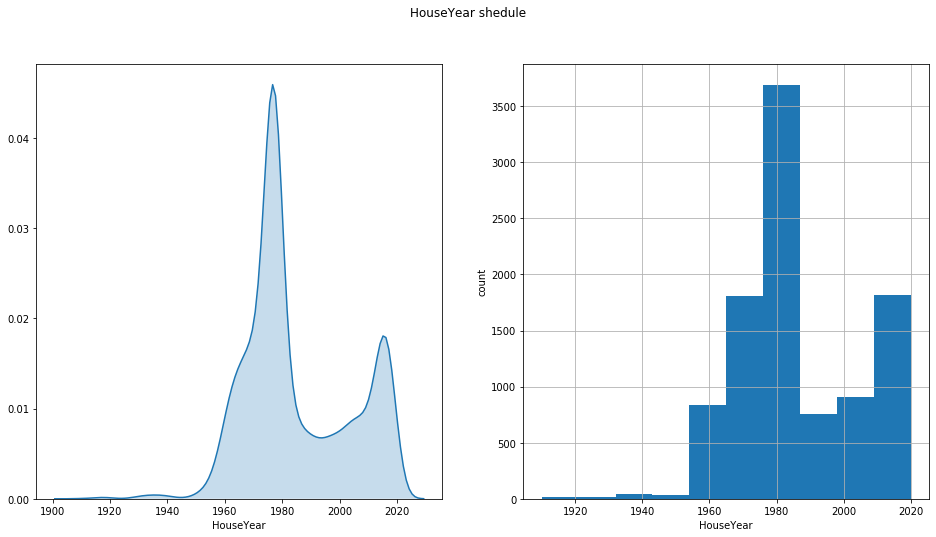

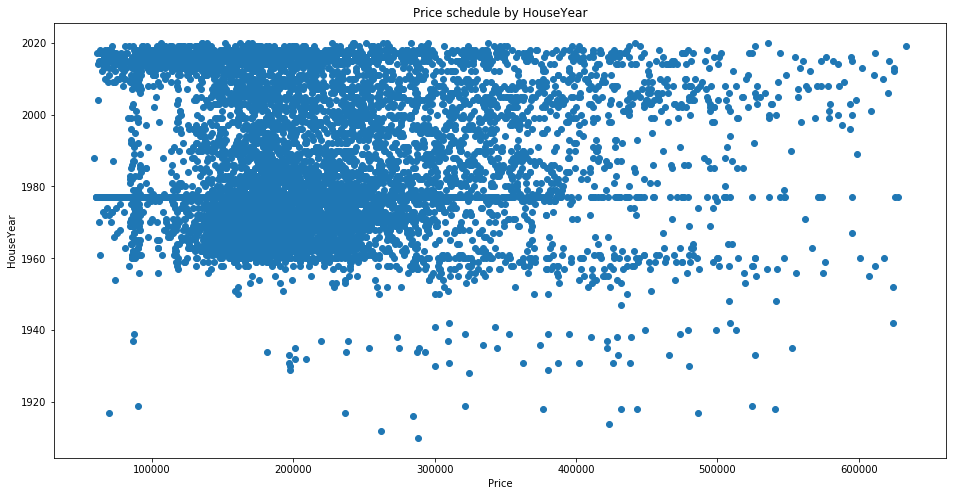

In [38]:
feature_check_hist('HouseYear')
feature_check_scatter('Price', 'HouseYear')

## HouseFloor

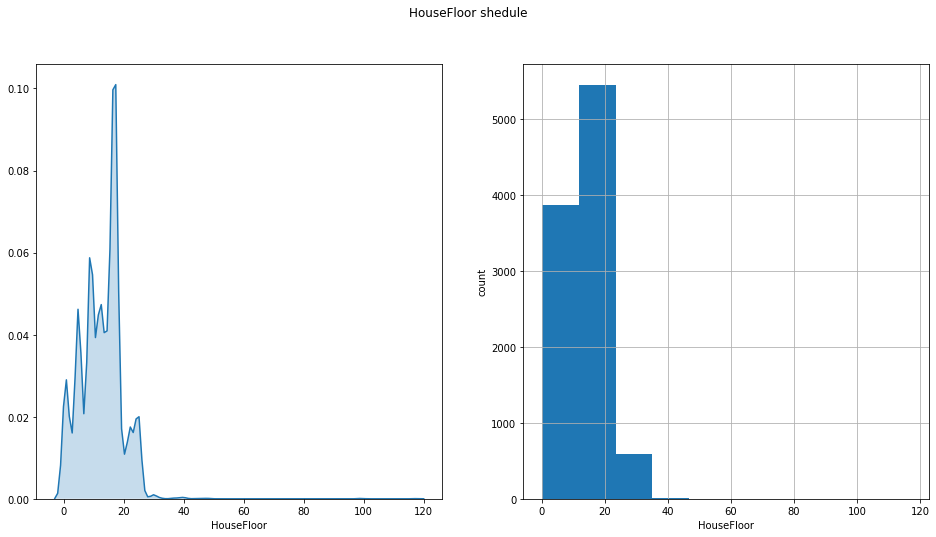

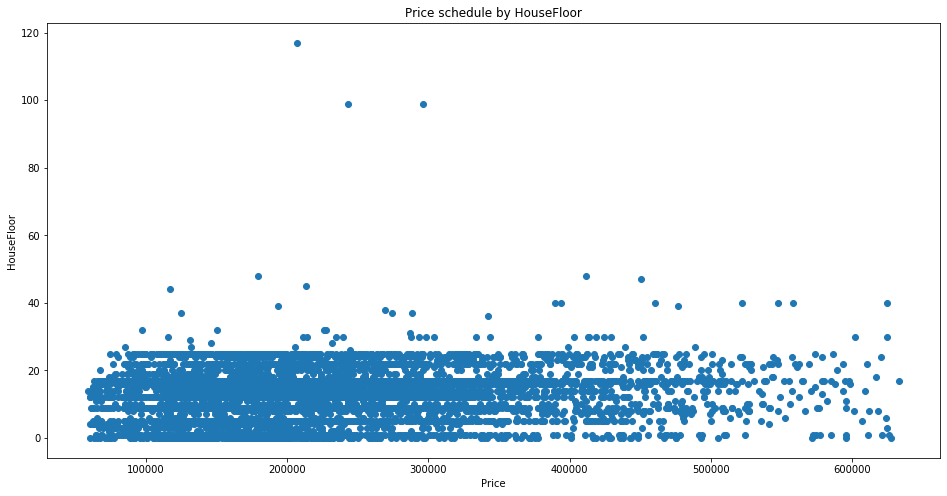

In [39]:
feature_check_hist('HouseFloor')
feature_check_scatter('Price', 'HouseFloor')

In [40]:
df_house_floor = df[['HouseYear', 'HouseFloor']].groupby('HouseYear').agg(
    [lambda x: round(np.percentile(x, q=10), 0),
     lambda x: round(np.percentile(x, q=50), 0),
     lambda x: round(np.percentile(x, q=90), 0),]

)
df_floor = df[['HouseYear', 'Floor']].groupby('HouseYear').agg(
    [lambda x: round(np.percentile(x, q=10), 0),
     lambda x: round(np.percentile(x, q=50), 0),
     lambda x: round(np.percentile(x, q=90), 0),]

)

In [41]:
df_house_floor = pd.DataFrame(df_house_floor.to_records())
df_floor = pd.DataFrame(df_floor.to_records())
df_floor_stats = pd.merge(df_house_floor, df_floor, on='HouseYear')
df_floor_stats.columns = [
    'HouseYear',
    'house_floor_min',
    'house_floor_median',
    'house_floor_max',
    'floor_min',
    'floor_median',
    'floor_max',
]

In [42]:
df = pd.merge(df, df_floor_stats, on='HouseYear', how='outer')

In [43]:
df_final = pd.merge(df_final, df_floor_stats, on='HouseYear', how='left')

In [44]:
df_final['house_floor_min'].fillna(df['HouseFloor'].quantile(0.1))
df_final['house_floor_median'].fillna(df['HouseFloor'].quantile(0.5))
df_final['house_floor_max'].fillna(df['HouseFloor'].quantile(0.9))
df_final['floor_min'].fillna(df['Floor'].quantile(0.1))
df_final['floor_median'].fillna(df['Floor'].quantile(0.5))
df_final['floor_max'].fillna(df['Floor'].quantile(0.9))

0       11.0
1       17.0
2       16.0
3       19.0
4       19.0
        ... 
4995    11.0
4996    19.0
4997    18.0
4998    17.0
4999    17.0
Name: floor_max, Length: 5000, dtype: float64

In [45]:
#HouseFloor
df.loc[(df['HouseFloor'] > df['house_floor_max'] * 1.25) |
       (df['HouseFloor'] < df['house_floor_min'] * 0.75), 'HouseFloor'] = \
df.loc[(df['HouseFloor'] > df['house_floor_max'] * 1.25) |
       (df['HouseFloor'] < df['house_floor_min'] * 0.75), 'house_floor_median']

#Floor
df.loc[(df['Floor'] > df['floor_max'] * 1.25) |
       (df['Floor'] < df['floor_min'] * 0.75), 'Floor'] = \
df.loc[(df['Floor'] > df['floor_max'] * 1.25) |
       (df['Floor'] < df['floor_max'] * 0.75), 'floor_median']

In [46]:
#HouseFloor
df_final.loc[(df_final['HouseFloor'] > df_final['house_floor_max'] * 1.25) |
       (df_final['HouseFloor'] < df_final['house_floor_min'] * 0.75), 'HouseFloor'] = \
df_final.loc[(df_final['HouseFloor'] > df_final['house_floor_max'] * 1.25) |
       (df_final['HouseFloor'] < df_final['house_floor_min'] * 0.75), 'house_floor_median']

#Floor
df_final.loc[(df_final['Floor'] > df_final['floor_max'] * 1.25) |
       (df_final['Floor'] < df_final['floor_min'] * 0.75), 'Floor'] = \
df_final.loc[(df_final['Floor'] > df_final['floor_max'] * 1.25) |
       (df_final['Floor'] < df_final['floor_max'] * 0.75), 'floor_median']

**Приравняем HouseFloor = Floor там где Floor > HouseFloor или HouseFloor == 0**

In [47]:
df.loc[(df['HouseFloor']==0) | (df['HouseFloor'] < df['Floor']), 'HouseFloor'] = \
df.loc[(df['HouseFloor']==0) | (df['HouseFloor'] < df['Floor']), 'Floor']

In [48]:
df_final.loc[(df_final['HouseFloor']==0) | (df_final['HouseFloor'] < df_final['Floor']), 'HouseFloor'] = \
df_final.loc[(df_final['HouseFloor']==0) | (df_final['HouseFloor'] < df_final['Floor']), 'Floor']

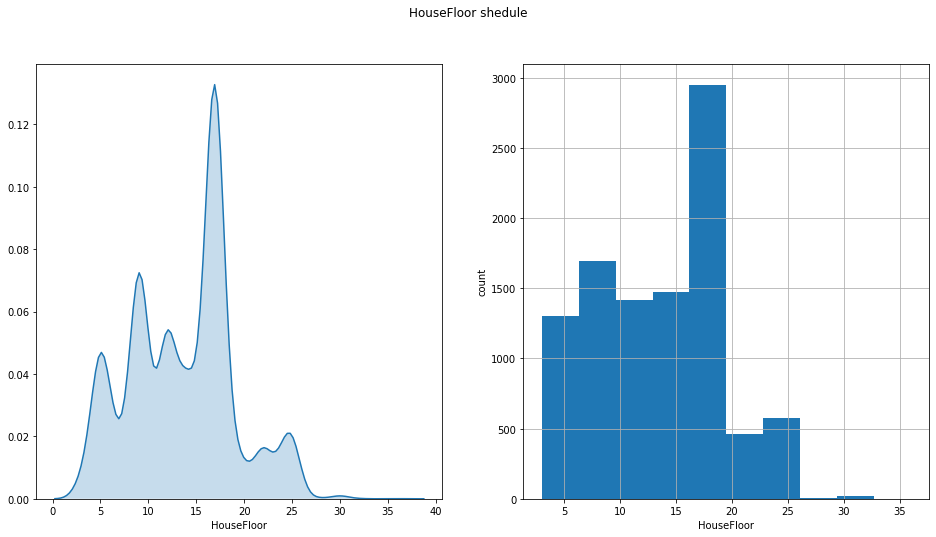

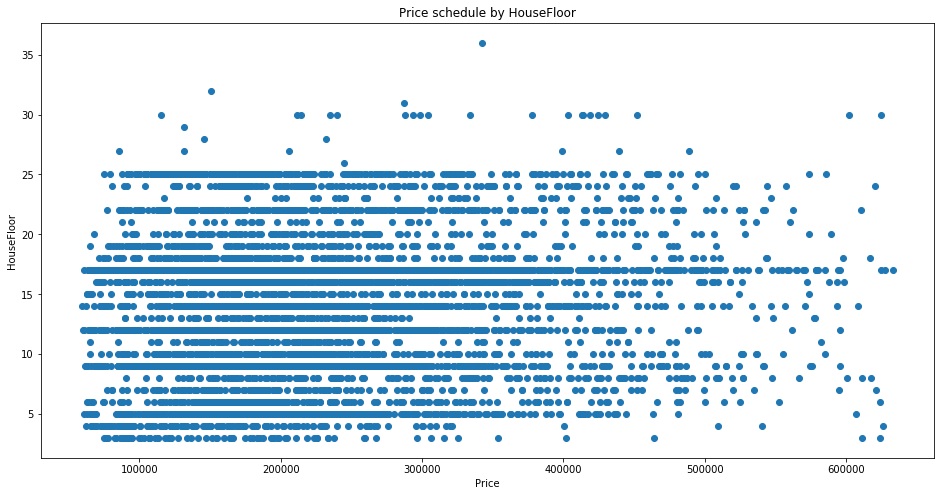

In [49]:
feature_check_hist('HouseFloor')
feature_check_scatter('Price', 'HouseFloor')

## Генерация новых признаков

In [50]:
df['room_square'] = df['Square'] / df['Rooms']
df['kitchen_proportion'] = df['KitchenSquare'] / df['Square']
df['life_square_proportion'] = df['LifeSquare'] / df['Square']
df['floor_proportion'] = df['Floor'] / df['HouseFloor']
df['house_age'] = 2020 - df['HouseYear']
df = pd.get_dummies(df)
df['additional_square'] = df['Square'] - (df['LifeSquare'] + df['KitchenSquare'])

In [51]:
df_final['room_square'] = df_final['Square'] / df_final['Rooms']
df_final['kitchen_proportion'] = df_final['KitchenSquare'] / df_final['Square']
df_final['life_square_proportion'] = df_final['LifeSquare'] / df_final['Square']
df_final['floor_proportion'] = df_final['Floor'] / df_final['HouseFloor']
df_final['house_age'] = 2020 - df_final['HouseYear']
df_final = pd.get_dummies(df_final)
df_final['additional_square'] = df_final['Square'] - (df_final['LifeSquare'] + df_final['KitchenSquare'])

In [52]:
remain_features = [
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'Ecology_1',
    'Social_1',
    'Social_2',
    'Social_3',
    'Helthcare_2',
    'Shops_1',
    'room_square',
    'kitchen_proportion',
    'life_square_proportion',
    'floor_proportion',
    'house_age',
    'Ecology_2_A',
    'Ecology_2_B',
    'Ecology_3_A',
    'Ecology_3_B',
    'Shops_2_A',
    'Shops_2_B',
    'additional_square',
]

In [53]:
X_train = df[remain_features]
X_valid = df_final[remain_features]

y_train = df['Price']
#y_valid = df_final['Price']

In [54]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

# RandomForestRegressor

In [55]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

model.fit(X_train, y_train)

y_pred_final = model.predict(X_valid)

preds_final['Price'] = y_pred_final

preds_final.to_csv('predictions.csv', index=False)

preds_final.head()
#evaluate_preds(y_train, y_train_preds)

,Id,Price
0,725,158198.393076
1,15856,207435.860585
2,5480,187730.030896
3,15664,310073.558510
4,14275,135526.774605


In [56]:
importances = list(model.feature_importances_)
feature_names = remain_features
features = list(feature_names)

In [57]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]

In [58]:
feature_weight_tuples = list(zip(features, importances))

In [59]:
df_feature_weigts = pd.DataFrame(feature_weight_tuples, columns=['feature', 'importance'])
print('These two are the most important features in the data set\n')
print(df_feature_weigts.nlargest(10, 'importance'))

These two are the most important features in the data set

          feature  importance
1          Square    0.334883
8        Social_2    0.108201
7        Social_1    0.106713
0           Rooms    0.086975
9        Social_3    0.066331
3   KitchenSquare    0.062802
6       Ecology_1    0.047066
2      LifeSquare    0.029695
12    room_square    0.029596
16      house_age    0.027970


In [60]:
df_total = pd.concat([df[remain_features], df_final[remain_features]])

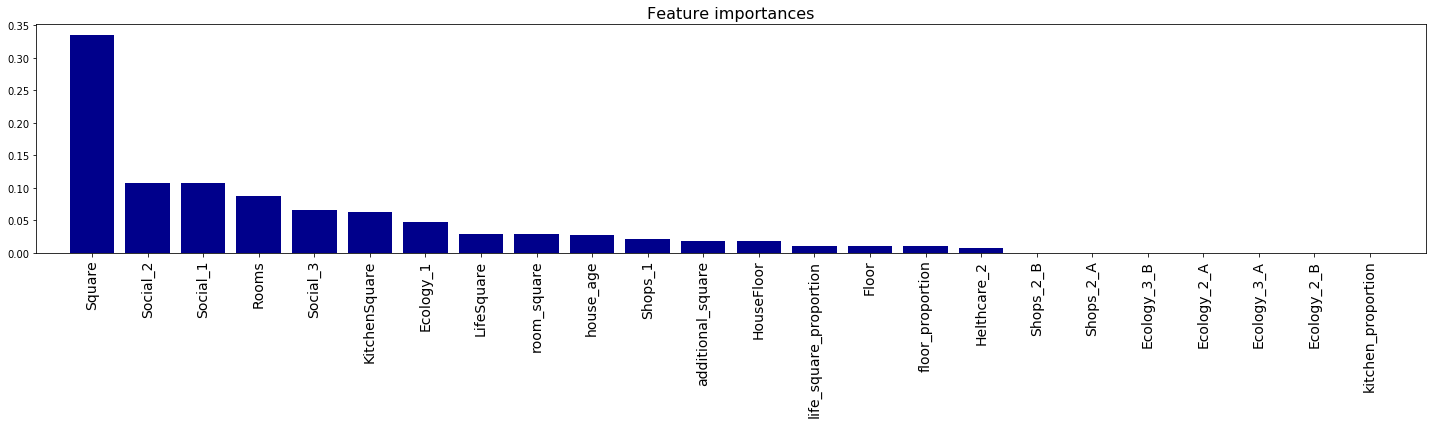

In [61]:
def plot_feature_importances(importances, X):
    
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (20, 6))
    plt.title("Feature importances", fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices] / importances.sum(),
           color="darkblue", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90, fontsize=14)
    plt.xlim([-1, X.shape[1]])

    plt.tight_layout()
    # plt.savefig('fe.jpg')
    plt.show()
    
plot_feature_importances(importances = model.feature_importances_, X=df_total)